**Fast Fourier transforms** <br>

---


**1-D discrete Fourier transforms** <br>
The FFT y[k] of length  of the length- sequence x[n] is defined as

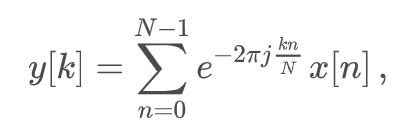

and the inverse transform is defined as follows

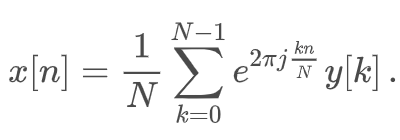

These transforms can be calculated by means of fft and ifft, respectively, as shown in the following example.


In [1]:
from scipy.fft import fft, ifft
import numpy as np

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
print('Y = ')
print(y)
print('------------------------------------------------------------------------')
yinv = ifft(y)
print('Y inversed = ')
print(yinv)

Y = 
[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
------------------------------------------------------------------------
Y inversed = 
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


In [2]:
np.sum(x)

4.5

T is  0.00125


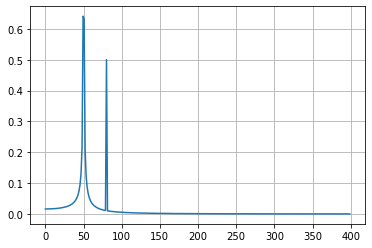

In [8]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
print("T is ", T)

x = np.linspace(0.0, N*T, N, endpoint=False)
# print("x is ", x)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
# print("xf is ", xf)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

SIGNAL:
[-32384 -31868 -31869 -31871 -32380 -32384 -31872 -32638 -32383 -32128
  32382  32639 -32641  32383  32638 -32641  31613  32380  32382  32381
  32639  32125  32638  32640 -32129 -31356 -31354 -31099 -31355 -31611
 -31611 -31356 -31611 -32638 -32382  32384  32381  32125  31611  31611
  31099  31097  31353  31355  31098  31865  32124 -32641 -31614 -31355]
Frame
11025


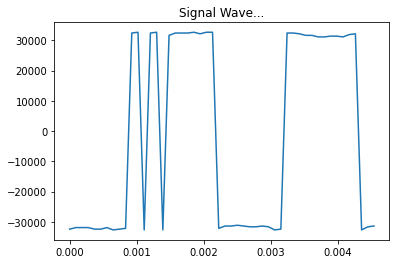

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

spf = wave.open("rire_diabolique4.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(100)
# signal = np.fromstring(signal, "int16")
signal = np.frombuffer(signal, "int16")

print("SIGNAL:")
print(signal)
fs = spf.getframerate()
print("Frame")
print(fs)

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)


Time = np.linspace(0, len(signal) / fs, num=len(signal))

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal)
plt.show()

In [64]:
from IPython.display import Audio
Audio("rire_diabolique4.wav")

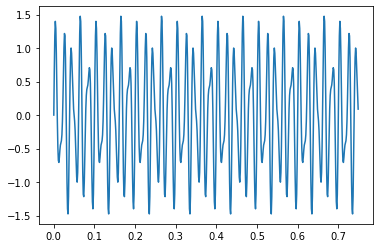

In [60]:
from scipy.io.wavfile import write

# SAMPLE_RATE = 44100  # Hertz

# from scipy.io.wavfile import read as read_wav
# import os

# os.chdir("C:/Users/User/Documents/Signal processing/ex2") # change to the file directory
# SAMPLE_RATE, data = read_wav("rire_diabolique4.wav") # enter your filename


spf = wave.open("rire_diabolique4.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
# signal = np.fromstring(signal, "int16")
signal = np.frombuffer(signal, "int16")

Time = np.linspace(0, len(signal) / fs, num=len(signal))
DURATION = Time # Seconds

def generate_sine_wave(freq, sample_rate, duration):
#     x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    
    N = 600
    # sample spacing
    T = 1.0 / 800.0


    x = np.linspace(0.0, N*T, N, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y =np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
#     y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 3 seconds
# 3 is a duration
x, y = generate_sine_wave(5, SAMPLE_RATE, Time)
plt.plot(x, y)
plt.show()
# Remember SAMPLE_RATE = 44100 Hz playback rate
# write("mysinewave.wav", SAMPLE_RATE, y)


In [61]:
Audio("mysinewave.wav")